In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns',None)

2024-04-22 22:14:32.213744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 22:14:32.213768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
home_path = '/home/simonhans/glacierml'
[
        data_path, RGI_path, glathida_path, 
        coregistration_testing_path, 
        arch_test_path, LOO_path
] = gl.set_paths(home_path)

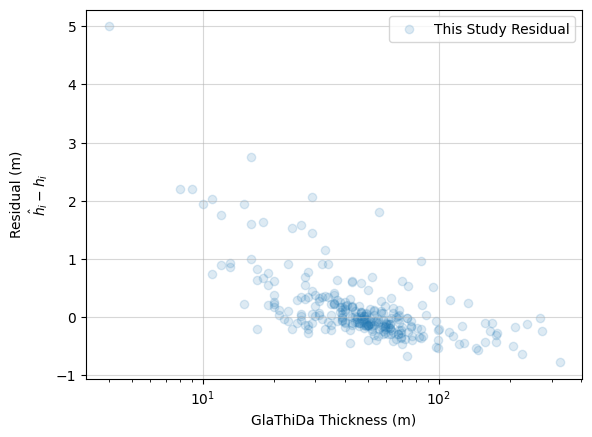

In [4]:
cols, train = gl.load_LOO_data(home_path,include_train = True)
x = train['Thickness']
y = np.mean(train[cols],axis = 1)
z = train['FMT']
plt.scatter(
    x,(y-x)/x,alpha = 0.15,label = 'This Study Residual'
)
# plt.scatter(
#     x,(z-x)/x,alpha = 0.15,label = 'Farinotti et al. Residual'
# )
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)\n$\hat{h}_i - h_i$')
plt.legend()
# plt.yscale('symlog')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()


In [5]:
train = pd.concat([train,pd.Series(y-x,name = 'r')],axis = 1)

In [6]:
train

,RGIId,CenLon,CenLat,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,GLIMSId,BgnDate,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,r
0,RGI60-11.02244,7.21308,46.327000,0.347,2703,2815,2864,13.4,340,664,29.0,G007213E46327N,20030799,20030999,11,1,0,0,0,0,9,9,NaN,11,32.0,30.0,32.0,31.0,31.0,33.0,34.0,32.0,33.0,30.0,32.0,30.0,32.0,33.0,33.0,31.0,32.0,33.0,33.0,32.0,33.0,32.0,31.0,31.0,30.0,32.0,33.0,31.0,31.0,32.0,31.0,31.0,33.0,30.0,31.0,29.0,31.0,32.0,31.0,32.0,30.0,31.0,32.0,32.0,31.0,30.0,30.0,30.0,31.0,29.0,31.0,30.0,31.0,32.0,30.0,32.0,32.0,31.0,33.0,30.0,31.0,29.0,31.0,30.0,32.0,31.0,31.0,32.0,33.0,30.0,30.0,31.0,30.0,30.0,32.0,31.0,31.0,30.0,32.0,33.0,30.0,30.0,30.0,29.0,29.0,31.0,32.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0,31.0,30.0,31.0,31.0,30.0,31.0,32.0,30.0,30.0,32.0,30.0,32.0,30.0,31.0,32.0,31.0,31.0,31.0,32.0,30.0,32.0,30.0,31.0,31.0,32.0,32.0,31.0,29.0,31.0,29.0,31.0,29.0,31.0,29.0,31.0,30.0,31.0,29.0,29.0,31.0,31.0,31.0,31.0,30.0,30.0,30.0,30.0,30.0,30.0,29.0,29.0,30.0,29.0,30.0,31.0,30.0,30.0,30.0,30.0,30.0,30.0,29.0,30.0,29.0,30.0,29.0,30.0,29.0,31.0,30.0,30.0,30.0,30.0,31.0,30.0,29.0,30.0,30.0,30.0,30.0,29.0,30.0,30.0,31.0,30.0,31.0,30.0,30.0,31.0,33.0,30.0,29.0,33.0,32.0,29.0,31.0,31.0,31.0,31.0,30.0,30.0,31.0,32.0,32.0,31.0,29.0,29.0,30.0,33.0,29.0,32.0,30.0,32.0,34.0,33.0,32.0,29.0,31.0,33.0,31.0,32.0,31.0,31.0,29.0,30.0,30.0,30.0,31.0,30.0,34.0,28.0,32.0,31.0,31.0,31.0,31.0,30.0,31.0,30.0,31.0,30.0,30.0,30.0,30.0,31.0,31.0,32.0,28.0,30.0,32.0,31.0,32.0,33.0,30.0,31.0,31.0,31.0,28.0,30.0,30.0,31.0,31.0,31.0,32.0,32.0,29.0,31.0,30.0,32.0,32.0,31.0,34.0,30.0,32.0,31.0,30.0,29.0,31.0,31.0,33.380962,1.791208
1,RGI60-08.02693,5.66100,61.733000,3.494,1058,1314,1354,4.5,143,2702,68.0,G005661E61733N,20060916,-9999999,8,2,0,0,0,0,9,0,NaN,08,70.0,70.0,74.0,72.0,72.0,70.0,73.0,71.0,76.0,71.0,71.0,72.0,70.0,76.0,70.0,71.0,70.0,70.0,76.0,73.0,76.0,73.0,71.0,73.0,71.0,74.0,73.0,70.0,72.0,73.0,72.0,71.0,72.0,70.0,73.0,70.0,71.0,72.0,72.0,72.0,70.0,69.0,69.0,73.0,70.0,70.0,68.0,69.0,70.0,73.0,68.0,67.0,70.0,72.0,72.0,71.0,71.0,69.0,69.0,68.0,73.0,70.0,69.0,72.0,70.0,68.0,70.0,72.0,67.0,67.0,70.0,69.0,67.0,69.0,72.0,67.0,71.0,67.0,69.0,70.0,69.0,70.0,68.0,67.0,66.0,69.0,68.0,70.0,68.0,67.0,68.0,69.0,67.0,73.0,68.0,68.0,68.0,72.0,68.0,70.0,71.0,69.0,68.0,73.0,73.0,65.0,73.0,74.0,69.0,70.0,70.0,68.0,68.0,71.0,68.0,71.0,68.0,69.0,68.0,68.0,69.0,70.0,70.0,71.0,71.0,68.0,71.0,69.0,71.0,68.0,71.0,67.0,67.0,71.0,68.0,67.0,73.0,66.0,68.0,68.0,69.0,70.0,72.0,68.0,68.0,68.0,70.0,68.0,69.0,68.0,68.0,68.0,69.0,70.0,70.0,70.0,68.0,69.0,71.0,69.0,70.0,68.0,70.0,69.0,69.0,70.0,70.0,71.0,70.0,69.0,69.0,68.0,72.0,71.0,69.0,69.0,70.0,68.0,69.0,70.0,69.0,71.0,70.0,72.0,68.0,67.0,70.0,73.0,70.0,70.0,69.0,70.0,71.0,70.0,72.0,71.0,74.0,70.0,70.0,70.0,69.0,69.0,72.0,71.0,74.0,70.0,75.0,76.0,74.0,74.0,69.0,68.0,74.0,70.0,69.0,68.0,69.0,68.0,67.0,72.0,69.0,73.0,68.0,68.0,71.0,70.0,75.0,72.0,72.0,72.0,68.0,67.0,72.0,71.0,69.0,72.0,68.0,71.0,70.0,72.

In [7]:
train[train['TermType'] == 5]

,RGIId,CenLon,CenLat,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,GLIMSId,BgnDate,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,r


In [8]:
train[train['Form'] == 1]

,RGIId,CenLon,CenLat,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,GLIMSId,BgnDate,EndDate,O1Region,O2Region,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,FMT,r
14,RGI60-09.00697,50.4331,80.5805,512.015,0,263,421,13.6,143,15512,176.0,G050433E80581N,20060702,20060719,9,1,0,0,1,1,9,9,Brousilov Ice Cap (Prince George Land),09,132.0,137.0,109.0,123.0,135.0,124.0,125.0,138.0,135.0,127.0,137.0,124.0,139.0,114.0,128.0,142.0,141.0,137.0,144.0,137.0,129.0,129.0,137.0,132.0,135.0,131.0,120.0,137.0,136.0,137.0,139.0,128.0,123.0,141.0,131.0,131.0,125.0,137.0,129.0,137.0,132.0,132.0,137.0,175.0,136.0,124.0,135.0,133.0,135.0,112.0,128.0,133.0,136.0,124.0,136.0,140.0,137.0,137.0,121.0,119.0,132.0,118.0,135.0,130.0,127.0,132.0,123.0,125.0,136.0,121.0,125.0,137.0,127.0,113.0,123.0,126.0,121.0,129.0,132.0,138.0,135.0,131.0,132.0,136.0,123.0,132.0,131.0,135.0,130.0,135.0,135.0,135.0,136.0,133.0,129.0,132.0,132.0,116.0,130.0,123.0,120.0,120.0,132.0,128.0,132.0,132.0,135.0,129.0,122.0,120.0,121.0,130.0,126.0,133.0,128.0,122.0,128.0,117.0,127.0,126.0,134.0,137.0,115.0,137.0,130.0,132.0,130.0,133.0,131.0,120.0,133.0,127.0,129.0,137.0,121.0,129.0,132.0,128.0,129.0,122.0,122.0,125.0,121.0,124.0,119.0,122.0,134.0,120.0,116.0,121.0,123.0,127.0,123.0,126.0,129.0,124.0,125.0,127.0,134.0,125.0,118.0,126.0,125.0,125.0,126.0,128.0,121.0,122.0,131.0,122.0,124.0,123.0,133.0,127.0,125.0,128.0,128.0,119.0,127.0,125.0,132.0,122.0,120.0,115.0,126.0,125.0,110.0,111.0,129.0,124.0,126.0,119.0,121.0,129.0,133.0,129.0,115.0,114.0,127.0,130.0,124.0,118.0,108.0,119.0,121.0,119.0,122.0,112.0,135.0,131.0,136.0,123.0,123.0,126.0,121.0,123.0,127.0,132.0,122.0,124.0,124.0,131.0,128.0,138.0,126.0,123.0,128.0,125.0,131.0,128.0,126.0,117.0,128.0,124.0,133.0,121.0,122.0,132.0,133.0,132.0,127.0,132.0,126.0,128.0,115.0,118.0,118.0,130.0,131.0,122.0,120.0,131.0,114.0,129.0,128.0,120.0,124.0,125.0,121.0,128.0,121.0,138.0,119.0,120.0,122.0,134.0,130.0,126.0,123.0,131.0,133.0,130.0,126.0,212.263690,-48.446884
26,RGI60-09.00807,64.6629,80.8577,432.494,12,176,505,11.9,111,26546,209.0,G064663E80858N,20010619,-9999999,9,1,0,0,1,1,9,9,Windy Ice Cap (Graham Bell Island),09,173.0,183.0,160.0,168.0,176.0,167.0,153.0,185.0,174.0,174.0,178.0,171.0,185.0,159.0,171.0,187.0,189.0,178.0,185.0,175.0,177.0,175.0,184.0,181.0,183.0,179.0,161.0,181.0,179.0,187.0,184.0,171.0,154.0,184.0,176.0,179.0,174.0,190.0,180.0,185.0,173.0,174.0,185.0,192.0,183.0,167.0,180.0,177.0,181.0,155.0,170.0,178.0,183.0,169.0,180.0,188.0,184.0,184.0,169.0,169.0,179.0,163.0,184.0,176.0,172.0,178.0,169.0,169.0,184.0,169.0,171.0,182.0,172.0,153.0,172.0,174.0,159.0,176.0,183.0,184.0,184.0,180.0,179.0,184.0,173.0,180.0,180.0,182.0,180.0,180.0,183.0,183.0,182.0,180.0,181.0,180.0,178.0,153.0,178.0,169.0,163.0,166.0,181.0,176.0,178.0,178.0,179.0,174.0,165.0,162.0,163.0,180.0,176.0,181.0,177.0,175.0,179.0,156.0,176.0,175.0,179.0,190.0,160.0,187.0,179.0,182.0,177.0,182.0,175.0,160.0,181.0,178.0,172.0,185.0,162.0,177.0,173.0,176.0,181.0,173.0,175.0,175.0,174.0,

In [9]:
glacs = train[train['Form'] == 0]
caps = train[train['Form'] == 1]

Text(0.5, 1.0, 'Residuals With GlaThiDa')

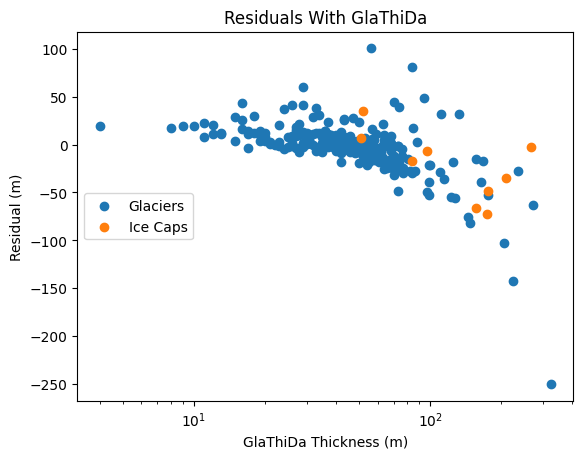

In [10]:
plt.scatter(glacs['Thickness'],glacs['r'],label = 'Glaciers')
plt.scatter(caps['Thickness'],caps['r'],label = 'Ice Caps')
plt.ylabel('Residual (m)')
plt.xlabel('GlaThiDa Thickness (m)')
plt.xscale('log')
plt.legend(loc = 'center left')
plt.title('Residuals With GlaThiDa')

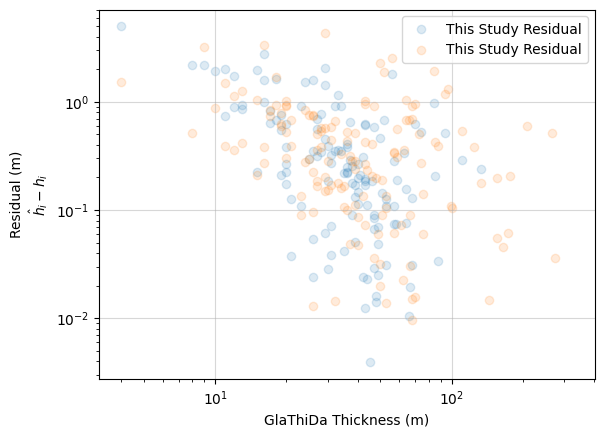

In [11]:
cols, train = gl.load_LOO_data(home_path,include_train = True)

x = train['Thickness']
y = np.mean(train[cols],axis = 1)
z = train['FMT']
plt.scatter(
    x,((y-x)/x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,((z-x)/x),alpha = 0.15,label = 'This Study Residual'
)
# plt.scatter(
#     x,(z-x)/x,alpha = 0.15,label = 'Farinotti et al. Residual'
# )
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)\n$\hat{h}_i - h_i$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()


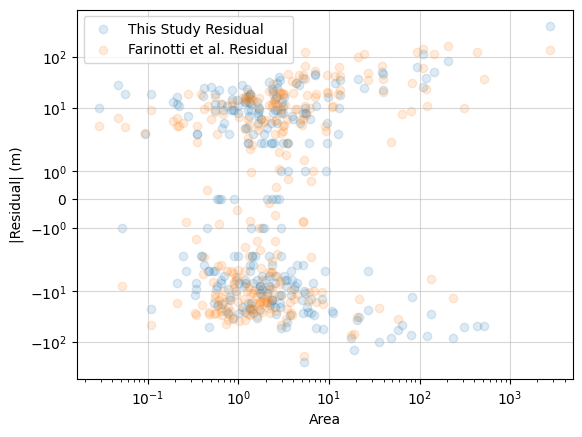

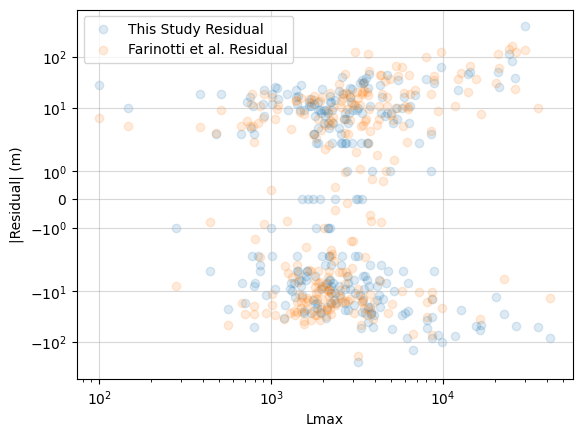

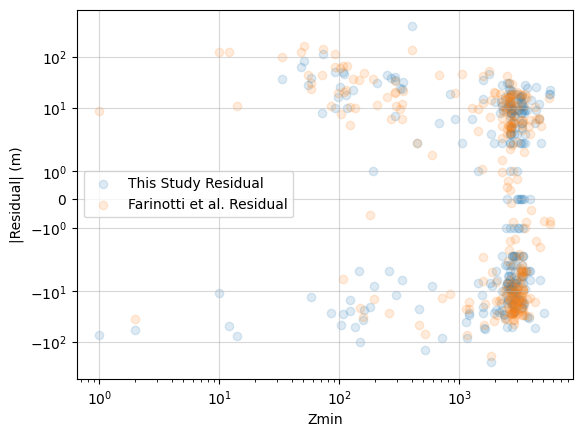

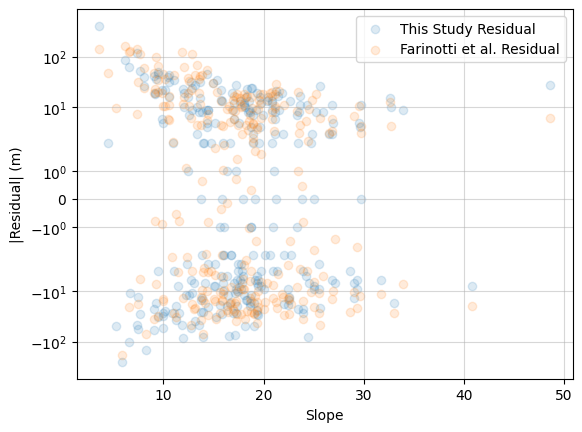

In [12]:
feat_list = ['Area','Lmax','Zmin','Slope']
for i in feat_list:
    
    x = train['Thickness']
    y = np.diagonal(train[cols])
    z = train['FMT']
    plt.scatter(
        train[i],(y-x),alpha = 0.15,label = 'This Study Residual'
    )
    plt.scatter(
        train[i],(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
    )
    plt.ylabel('|Residual| (m)')
    plt.legend()
    plt.yscale('symlog')
    if i != 'Slope':
        plt.xscale('log')
    plt.xlabel(i)

    plt.grid(alpha = 0.5)
    plt.show()
